In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazons-500-bestsellers-in-laptop-gear-2024/amazon_top500.csv


**INSPECTING DATA**

In [2]:
df=pd.read_csv("/kaggle/input/amazons-500-bestsellers-in-laptop-gear-2024/amazon_top500.csv")
df.head()

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN


In [3]:
df.describe()

,price/value,stars,reviewsCount
count,470.000000,259.000000,259.000000
mean,38.341702,4.530502,942.054054
std,50.885042,0.501428,3559.287165
min,2.990000,1.000000,1.000000
25%,9.990000,4.400000,8.000000
50%,24.990000,4.600000,39.000000
75%,44.052500,4.800000,347.000000
max,575.000000,5.000000,42821.000000


In [4]:
df.shape

(500, 7)

In [5]:
df.dtypes

title              object
brand              object
description        object
price/currency     object
price/value       float64
stars             float64
reviewsCount      float64
dtype: object

In [6]:
df['title']

0      65W Universal USB C Chromebook Charger,Replace...
1      EMPSIGN Laptop Tote bag for women 16 Inch, Sty...
2      100Pcs Mario Stickers, Cartoon Game Mario Stic...
3      USB Docking Station, JESWO USB 3.0 Laptop Dock...
4      ANCBD C31N1824 Battery for Asus Chromebook Fli...
                             ...                        
495    Cartoon Duck Stickers Duck Stickers Pack 50pcs...
496    GBOLE Replacement for HP Notebook 15-DY 15-DY0...
497    DMKAOLLK USB-C Replacement for Lenovo Laptop C...
498    Cloudstyle Laptop Backpack Slim Durable Colleg...
499    MULS L19M3PD9 57Wh Laptop Battery Replacement ...
Name: title, Length: 500, dtype: object

In [7]:
df.loc[4]

title             ANCBD C31N1824 Battery for Asus Chromebook Fli...
brand                                                         ANCBD
description       Specification: Battery Rating: 11.55V Battery ...
price/currency                                                    $
price/value                                                   46.99
stars                                                           NaN
reviewsCount                                                    NaN
Name: 4, dtype: object

In [8]:
df.loc[66]

title             50pcs Gilmor Girl Stickers for Laptop, Funny U...
brand                                                          BJSK
description                                                     NaN
price/currency                                                    $
price/value                                                    5.99
stars                                                           4.6
reviewsCount                                                   76.0
Name: 66, dtype: object

**SUBSETTING DATA**

In [9]:
df_1=df[['brand','price/value', 'stars', 'reviewsCount']]
df_1

,brand,price/value,stars,reviewsCount
0,NELEBUTO,13.69,4.2,55.0
1,EMPSIGN,31.99,4.9,58.0
2,MOQIAN,5.99,4.6,42.0
3,JESWO,79.99,4.2,39.0
4,ANCBD,46.99,NaN,NaN
...,...,...,...,...
495,AYODPE,5.99,NaN,NaN
496,GBOLE,69.00,NaN,NaN
497,DMKAOLLK,16.99,NaN,NaN
498,Cloudstyle,9.99,NaN,NaN


In [10]:
df_1.loc[df['price/value']>250.0]

,brand,price/value,stars,reviewsCount
239,TUMI,575.00,4.4,31.0
323,HPDELGB,349.99,NaN,NaN
335,UGREEN,279.99,NaN,NaN
407,intpw,299.99,4.0,33.0
464,WARWOLFTEAM,349.00,NaN,NaN


In [11]:
df.loc[df['price/value'].isna()]

,title,brand,description,price/currency,price/value,stars,reviewsCount
56,bagswan Large Travel Backpack for Women - 17 I...,bagswan,NaN,NaN,NaN,NaN,NaN
57,"50Pcs Be Kind Stickers Pack, Inspirational Quo...",SBOBUY,"50Pcs Be Kind Stickers Pack, Inspirational Quo...",NaN,NaN,4.7,9.0
83,Carhartt 25 L Classic Laptop Backpack,Carhartt,NaN,NaN,NaN,4.6,87.0
91,"Lenovo Legion Gaming Laptop Bag, Double-Layere...",Lenovo,NaN,NaN,NaN,4.7,3880.0
104,200Pcs Inspirational Christian Stickers for Wa...,KASANYER,200Pcs Inspirational Christian Stickers for Wa...,NaN,NaN,4.6,135.0
106,Teryeefi Case for MacBook Pro 14 Inch M3 Pro/M...,Teryeefi,NaN,NaN,NaN,NaN,NaN
110,Laptop Backpack for Women Bag - 15.6 inch Work...,bagswan,NaN,NaN,NaN,4.8,73.0
113,65W AC Adapter Charger Fit for Acer Aspire 1 A...,HSXIRQA,Fit for Acer Aspire 1 A114-32 A114-31 Series A...,NaN,NaN,NaN,NaN
126,Thermaltake Massive 20 RGB Steel Mesh Panel Si...,Thermaltake,Light up your gaming laptops with 256 colors: ...,NaN,NaN,4.3,4435.0
161,bergsalz Travel Backpack For Women Men Laptop ...,bergsalz,NaN,NaN,NaN,4.4,30.0


**Create a new column**

In [12]:
df['totalcount']=df['stars']*df['reviewsCount']
df

,title,brand,description,price/currency,price/value,stars,reviewsCount,totalcount
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0,231.0
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0,284.2
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0,193.2
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0,163.8
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,$,5.99,NaN,NaN,NaN
496,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,GBOLE,"Specification: Screen Size: 15.6"" Max. Resol...",$,69.00,NaN,NaN,NaN
497,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,DMKAOLLK,NaN,$,16.99,NaN,NaN,NaN
498,Cloudstyle Laptop Backpack Slim Durable Colleg...,Cloudstyle,NaN,$,9.99,NaN,NaN,NaN


<Axes: title={'center': 'Distribution of price'}, ylabel='Frequency'>

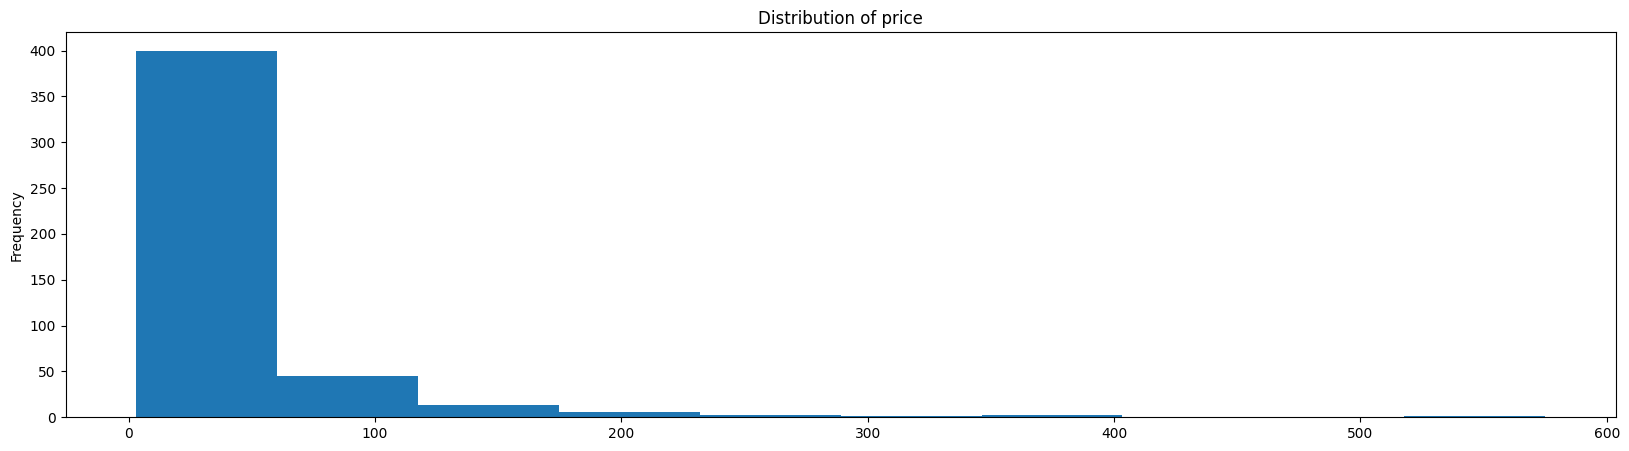

In [13]:
df['price/value'].plot(kind='hist', bins=10,title= 'Distribution of price',figsize=(20,5))

<Axes: title={'center': 'review vs price'}, xlabel='reviewsCount', ylabel='price/value'>

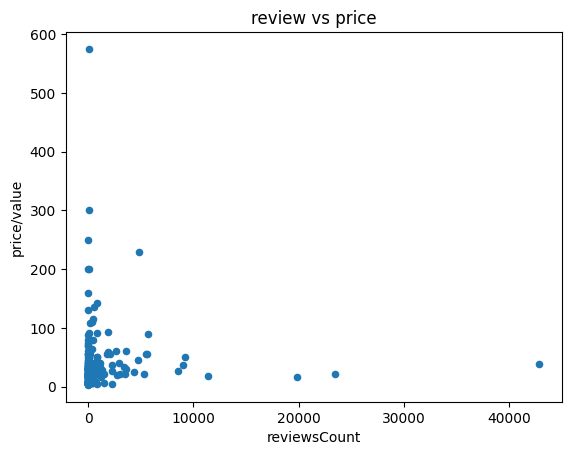

In [14]:
df.plot(kind= 'scatter',x='reviewsCount', y='price/value',title='review vs price')